# Instruction Partners Research Analyst Content Exercise

1. What is the average breakdown of student scores on early literacy benchmark tests? What does this look like by grade?


2. What is the percentage of students that grew out of the bottom quartile on the early literacy benchmark from Fall to Winter? What does this look like by grade? By teacher? 


3. Teachers are curious to know what difference, if any, progress monitoring on the universal screener had on Winter benchmark scores. For students who moved out of the bottom quartile, what percentage received at least 1 progress monitoring assessment on a literacy measure? Was there a relationship between the number of monitoring tests received and the winter score? What does this look like by teacher?

## 1. Import packages and load files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()

In [3]:
fall = pd.read_excel('StudentData_Fall.xlsx')
winter = pd.read_excel('StudentData_Winter.xlsx')

In [4]:
fall.head()

,school,teacher_id,student_id,StudentGrade,IEP_Reading,IEP_LangArts,IEP_Writing,IEP_Math,IEP_Behavior,Gender,...,Type,IsBatteryScore,RelatedForm,MeasureName,MeasureGrade,FormCode,Score,ScaledScore,AdministrationDate,Natl
0,School B,10,1,2,NaN,NaN,NaN,NaN,NaN,M,...,BM,0,CA,Concepts & Applications,2,BBAWM02CA101,12,NaN,2021-09-08,23
1,School B,10,1,2,NaN,NaN,NaN,NaN,NaN,M,...,BM,0,VOC,Vocabulary,2,BBAWR02VOC101,7,NaN,2021-09-10,6
2,School B,10,1,2,NaN,NaN,NaN,NaN,NaN,M,...,BM,0,NCF-T,Number Comparison Fluency-Triads,2,BBAWM02NSF101,9,NaN,2021-09-08,57
3,School B,10,1,2,NaN,NaN,NaN,NaN,NaN,M,...,BM,0,MCF,Mental Computation Fluency,2,BBAWM02NSF101,3,NaN,2021-09-08,8
4,School B,10,1,2,NaN,NaN,NaN,NaN,NaN,M,...,BM,0,ORF,Oral Reading Fluency,2,DRF_ORF0201,3,NaN,2021-09-10,2


In [5]:
winter.head()

,school,teacher_id,student_id,StudentGrade,IEP_Reading,IEP_LangArts,IEP_Writing,IEP_Math,IEP_Behavior,Gender,...,Type,IsBatteryScore,RelatedForm,MeasureName,MeasureGrade,FormCode,Score,ScaledScore,AdministrationDate,Natl
0,School B,10,1,2,NaN,NaN,NaN,NaN,NaN,M,...,BM,0,RC,Reading Comprehension,2,BBAWR02RC201,6,NaN,2022-01-27,4.0
1,School B,10,1,2,NaN,NaN,NaN,NaN,NaN,M,...,BM,0,NCF-T,Number Comparison Fluency-Triads,2,BBAWM02NSF201,3,NaN,2022-01-27,11.0
2,School B,10,1,2,NaN,NaN,NaN,NaN,NaN,M,...,BM,0,MCF,Mental Computation Fluency,2,BBAWM02NSF201,3,NaN,2022-01-27,6.0
3,School B,10,1,2,NaN,NaN,NaN,NaN,NaN,M,...,BM,0,CA,Concepts & Applications,2,BBAWM02CA201,10,NaN,2022-01-27,4.0
4,School B,10,1,2,NaN,NaN,NaN,NaN,NaN,M,...,BM,0,NSF,Number Sense Fluency,2,BBAWM02NSF201,3,NaN,2022-01-27,3.0


In [6]:
fall.columns == winter.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [7]:
df = pd.concat([fall, winter])

In [8]:
df.columns

Index(['school', 'teacher_id', 'student_id', 'StudentGrade', 'IEP_Reading',
       'IEP_LangArts', 'IEP_Writing', 'IEP_Math', 'IEP_Behavior', 'Gender',
       'ESL', 'MealStatus', 'Ethnicity', 'Section504', 'After_School',
       'Correctional', 'Summer_School', 'IDEA', 'Period', 'Type',
       'IsBatteryScore', 'RelatedForm', 'MeasureName', 'MeasureGrade',
       'FormCode', 'Score', 'ScaledScore', 'AdministrationDate', 'Natl'],
      dtype='object')

In [9]:
#drop unnecessary columns
df=df.drop(columns=['IEP_Reading',
                 'IEP_LangArts', 
                 'IEP_Writing', 
                 'IEP_Math', 
                 'IEP_Behavior',  
                 'ESL', 
                 'MealStatus', 
                 'Ethnicity', 
                 'Section504', 
                 'After_School',
                 'Correctional', 
                 'Summer_School', 
                 'IDEA'])

In [10]:
# check different measure names
df['MeasureName'].unique()

array(['Concepts & Applications', 'Vocabulary',
       'Number Comparison Fluency-Triads', 'Mental Computation Fluency',
       'Oral Reading Fluency', 'Number Sense Fluency', 'Math', 'Spelling',
       'Reading Comprehension', 'Reading',
       'Number Comparison Fluency-Pairs', 'Math Facts Fluency-1 Digit',
       'Early Literacy', 'Listening Comprehension',
       'Letter Word Sounds Fluency', 'Nonsense Word Fluency',
       'Early Numeracy', 'Phoneme Segmentation', 'Word Reading Fluency',
       'Auditory Vocabulary', 'Print Concepts', 'Number Naming Fluency',
       'Initial Sounds', 'Quantity Total Fluency',
       'Letter Naming Fluency', 'Math Facts Fluency-Tens',
       'Quantity Difference Fluency'], dtype=object)

In [11]:
# create list of literacy measures to filter dataframe on (as in, dropping math measures)
lit_measures = ['Vocabulary',
                'Oral Reading Fluency', 
                'Spelling',
                'Reading Comprehension', 
                'Reading',
                'Early Literacy', 
                'Listening Comprehension',
                'Letter Word Sounds Fluency', 
                'Nonsense Word Fluency',
                'Phoneme Segmentation', 
                'Word Reading Fluency',
                'Auditory Vocabulary', 
                'Print Concepts', 
                'Initial Sounds', 
                'Letter Naming Fluency']

In [12]:
# filter for literacy measures only
df = df.loc[df['MeasureName'].isin(lit_measures)]

## What is the average breakdown of student scores on early literacy benchmark tests? What does this look like by grade?

In [13]:
# check values of MeasureName
df['MeasureName'].unique()

array(['Vocabulary', 'Oral Reading Fluency', 'Spelling',
       'Reading Comprehension', 'Reading', 'Early Literacy',
       'Listening Comprehension', 'Letter Word Sounds Fluency',
       'Nonsense Word Fluency', 'Phoneme Segmentation',
       'Word Reading Fluency', 'Auditory Vocabulary', 'Print Concepts',
       'Initial Sounds', 'Letter Naming Fluency'], dtype=object)

In [14]:
# create new dataframe filtered for Early Literacy
early_lit = df[df['MeasureName']=='Early Literacy']

In [15]:
early_lit.head()

,school,teacher_id,student_id,StudentGrade,Gender,Period,Type,IsBatteryScore,RelatedForm,MeasureName,MeasureGrade,FormCode,Score,ScaledScore,AdministrationDate,Natl
381,School B,10,40,1,F,Fall,BM,1,ELB,Early Literacy,1,DRF_ORF0101,14,NaN,2021-09-07,11.0
399,School B,10,41,1,M,Fall,BM,1,ELB,Early Literacy,1,DRF_ORF0101,49,NaN,2021-09-08,71.0
413,School B,5,42,1,M,Fall,BM,1,ELB,Early Literacy,1,DRF_ORF0101,3,NaN,2021-09-08,2.0
417,School B,10,43,1,F,Fall,BM,1,ELB,Early Literacy,1,DRF_ORF0101,33,NaN,2021-09-07,53.0
438,School B,10,44,1,M,Fall,BM,1,ELB,Early Literacy,1,DRF_ORF0101,10,NaN,2021-09-09,6.0


In [16]:
early_lit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 381 to 9881
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   school              705 non-null    object        
 1   teacher_id          705 non-null    int64         
 2   student_id          705 non-null    int64         
 3   StudentGrade        705 non-null    object        
 4   Gender              705 non-null    object        
 5   Period              705 non-null    object        
 6   Type                705 non-null    object        
 7   IsBatteryScore      705 non-null    int64         
 8   RelatedForm         705 non-null    object        
 9   MeasureName         705 non-null    object        
 10  MeasureGrade        705 non-null    object        
 11  FormCode            705 non-null    object        
 12  Score               705 non-null    int64         
 13  ScaledScore         0 non-null      float64    

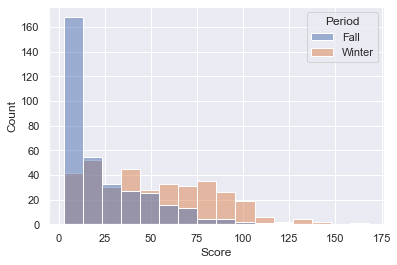

In [17]:
sns.histplot(x='Score', data = early_lit, hue = 'Period')
plt.show()

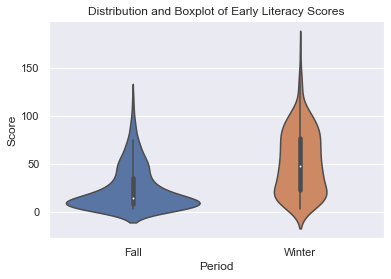

In [18]:
sns.violinplot(x='Period', y='Score', data = early_lit, dodge=True)
plt.title('Distribution and Boxplot of Early Literacy Scores')
plt.show()

In [19]:
per_score = early_lit.groupby('Period')['Score'].describe()
per_score

,count,mean,std,min,25%,50%,75%,max
Period,,,,,,,,
Fall,349.0,24.017192,22.669407,3.0,8.00,14.0,35.0,119.0
Winter,356.0,51.547753,32.862762,3.0,22.75,48.0,77.0,168.0


In [20]:
per_score['std'][0]

22.66940675088735

In [21]:
mean_pct_increase = (per_score['mean'][1]-per_score['mean'][0])/per_score['mean'][0]
print('Percent increase of mean Early Literacy Benchmark score:', mean_pct_increase*100, '%')

Percent increase of mean Early Literacy Benchmark score: 114.62855798541014 %


In [22]:
gr_per_score = early_lit.groupby(['StudentGrade', 'Period'])['Score'].describe()
gr_per_score

count       mean        std  min   25%   50%   75%    max
StudentGrade Period                                                           
1            Fall    172.0  17.098837  18.633008  3.0   6.0  10.0  20.0  119.0
             Winter  177.0  33.847458  24.980092  3.0  16.0  27.0  46.0  102.0
K            Fall    177.0  30.740113  24.219175  3.0  10.0  24.0  48.0  103.0
             Winter  179.0  69.050279  30.286325  3.0  49.0  70.0  88.0  168.0

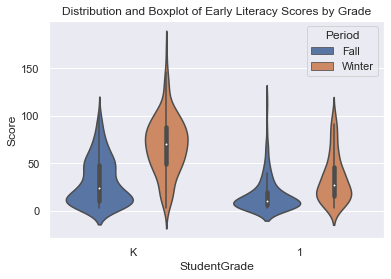

In [23]:
sns.violinplot(x='StudentGrade', y='Score', hue = 'Period', order = ['K','1'], data = early_lit, dodge=True)
plt.title('Distribution and Boxplot of Early Literacy Scores by Grade')
plt.show()

Overall, we're seeing that Early Literacy Benchmark scores have improved from Fall to Winter. The mean score (for both Kindergarten and 1st grade combined) increased from 24.0 to 51.5.  This is a 114% increase.  

The scores at each of the quartiles have increased as well.  The 25th percentile score increased from 8 to 22.75, the 50th percentile score increased from 14 to 48, the 75th percentile score increased from 35 to 77, and the 100th percentile score increased from 119 to 168.

We see similar increases in both Kintergarteners and 1st graders from Fall to Winter.  The slight difference is that the max score for 1st graders actually <i>decreased</i> from Fall to Winter.

<b>Kintergarten:</b> <br>
Mean: 30.74 to 69.05 (125% increase)<br>
25th: 10 to 49 (390% increase)<br>
50th: 24 to 70 (192% increase)<br>
75th: 48 to 88 (83% increase)<br>
100th: 103 to 168 (63% increase)

<b>1st grade:</b> <br>
Mean: 17.10 to 33.85 (98% increase)<br>
25th: 6 to 16 (167% increase)<br>
50th: 10 to 27 (170% increase) <br>
75th: 20 to 46 (130% increase) <br>
100th: 119 to 102 (14% <i>decrease</i>)

## What is the percentage of students that grew out of the bottom quartile on the early literacy benchmark from Fall to Winter? What does this look like by grade? By teacher?

<u><b>Question:</b></u> When counting students, should we determine the percentage of students within 25th percentile from Fall that grew out of the 25th percentile score for the Fall, or should we determine the percentage of students within 25th percentile from Fall that grew out of the 25th percentile score for the Winter?

For this exercise, we will assume the latter.

In [24]:
# establish variables for 25th percentile scores
fall_25th = per_score['25%'][0]
winter_25th = per_score['25%'][1]

In [25]:
# filter early_lit dataframe for fall scores within 25th pctile
early_lit_fall25 = early_lit.loc[(early_lit['Period']=='Fall') & (early_lit['Score']<= fall_25th)]
early_lit_fall25.head(10)

,school,teacher_id,student_id,StudentGrade,Gender,Period,Type,IsBatteryScore,RelatedForm,MeasureName,MeasureGrade,FormCode,Score,ScaledScore,AdministrationDate,Natl
413,School B,5,42,1,M,Fall,BM,1,ELB,Early Literacy,1,DRF_ORF0101,3,NaN,2021-09-08,2.0
457,School B,10,46,1,F,Fall,BM,1,ELB,Early Literacy,1,DRF_ORF0101,3,NaN,2021-09-07,2.0
830,School B,10,82,1,F,Fall,BM,1,ELB,Early Literacy,1,DRF_ORF0101,8,NaN,2021-09-08,3.0
1386,School B,10,137,1,M,Fall,BM,1,ELB,Early Literacy,1,DRF_ORF0101,8,NaN,2021-09-07,3.0
1539,School B,10,148,1,F,Fall,BM,1,ELB,Early Literacy,1,DRF_ORF0101,7,NaN,2021-09-16,3.0
1667,School B,10,159,1,F,Fall,BM,1,ELB,Early Literacy,1,DRF_ORF0101,6,NaN,2021-09-09,2.0
1846,School B,10,178,1,F,Fall,BM,1,ELB,Early Literacy,1,DRF_ORF0101,3,NaN,2021-09-08,2.0
1889,School B,5,186,1,M,Fall,BM,1,ELB,Early Literacy,1,DRF_ORF0101,3,NaN,2021-09-08,2.0
1940,School B,10,193,1,F,Fall,BM,1,ELB,Early Literacy,1,DRF_ORF0101,8,NaN,2021-09-07,3.0
1956,School B,10,194,1,M,Fall,BM,1,ELB,Early Literacy,1,DRF_ORF0101,7,NaN,2021-09-07,3.0


In [26]:
#number of students within 25th percentile in fall
len(early_lit_fall25)

105

In [27]:
#obtain student ids for these 105 students
fall_25_id = list(early_lit_fall25['student_id'])

In [28]:
# filter early_lit dataframe for WINTER scores of these same students that are above the winter 25th percentile
early_lit_winter = early_lit.loc[(early_lit['Period']=='Winter') & 
                                 (early_lit['student_id'].isin(fall_25_id)) & 
                                 (early_lit['Score']> winter_25th)
                                ]
early_lit_winter.head(10)

,school,teacher_id,student_id,StudentGrade,Gender,Period,Type,IsBatteryScore,RelatedForm,MeasureName,MeasureGrade,FormCode,Score,ScaledScore,AdministrationDate,Natl
1897,School B,10,193,1,F,Winter,BM,1,ELB,Early Literacy,1,DRF_ORF0102,25,NaN,2022-01-13,11.0
1920,School B,10,195,1,M,Winter,BM,1,ELB,Early Literacy,1,DRF_ORF0102,23,NaN,2022-01-14,9.0
1931,School B,10,196,1,M,Winter,BM,1,ELB,Early Literacy,1,DRF_ORF0102,28,NaN,2022-01-13,15.0
2198,School B,10,222,1,F,Winter,BM,1,ELB,Early Literacy,1,DRF_ORF0102,24,NaN,2022-01-13,10.0
2530,School B,10,251,1,M,Winter,BM,1,ELB,Early Literacy,1,DRF_ORF0102,24,NaN,2022-01-13,10.0
2593,School B,10,256,1,M,Winter,BM,1,ELB,Early Literacy,1,DRF_ORF0102,26,NaN,2022-01-14,13.0
2813,School B,5,275,1,F,Winter,BM,1,ELB,Early Literacy,1,DRF_ORF0102,23,NaN,2022-01-13,9.0
2999,School B,10,324,1,M,Winter,BM,1,ELB,Early Literacy,1,DRF_ORF0102,24,NaN,2022-01-14,10.0
3039,School B,10,327,1,F,Winter,BM,1,ELB,Early Literacy,1,DRF_ORF0102,28,NaN,2022-01-18,15.0
3126,School B,10,334,1,F,Winter,BM,1,ELB,Early Literacy,1,DRF_ORF0102,29,NaN,2022-01-13,16.0


In [29]:
len(early_lit_winter)

34

In [30]:
#percentage of students that grew out of the bottom quartile on the early literacy benchmark from Fall to Winter
pct = round(len(early_lit_winter)/len(early_lit_fall25) * 100, 2)
print('Percentage of students that grew out of the bottom quartile on the early literacy benchmark from Fall to Winter:')
print(str(pct)+'%')

Percentage of students that grew out of the bottom quartile on the early literacy benchmark from Fall to Winter:
32.38%


Next, we'll determine the percentage of students that grew out of the bottom quartile by grade.

In [31]:
# group fall students below 25th percentile by grade
gr_count_fall = early_lit_fall25.groupby('StudentGrade')['student_id'].count()
gr_count_fall

StudentGrade
1    73
K    32
Name: student_id, dtype: int64

In [32]:
# group those same students that exceed 25th percentile in winter by grade
gr_count_winter = early_lit_winter.groupby('StudentGrade')['student_id'].count()
gr_count_winter

StudentGrade
1    14
K    20
Name: student_id, dtype: int64

In [33]:
# calculate percentage by grade
gr_count_winter/gr_count_fall * 100

StudentGrade
1    19.178082
K    62.500000
Name: student_id, dtype: float64

63% of Kintergartners grew out of the bottom quartile in early literacy benchmark tests from Fall to Winter. <br>
19% of 1st graders grew out of the bottom quartile in early literacy benchmark tests from Fall to Winter.

Next, we'll determine the percentage of students that grew out of the bottom quartile by teacher.

In [34]:
# group fall students below 25th percentile by teacher
tch_count_fall = early_lit_fall25.groupby('teacher_id')['student_id'].count()
tch_count_fall

teacher_id
4      2
5      7
6      3
7      2
9      3
10    57
11     2
14     7
17     2
18     2
22     4
23    14
Name: student_id, dtype: int64

In [35]:
# group those same students that exceed 25th percentile in winter by teacher
tch_count_winter = early_lit_winter.groupby('teacher_id')['student_id'].count()
tch_count_winter

teacher_id
4      2
5      2
6      2
7      1
9      1
10    12
11     1
18     2
22     2
23     9
Name: student_id, dtype: int64

In [36]:
#determine percentage of students by teacher that grew out of bottom quartile from Fall to Winter
tch_count_winter/tch_count_fall*100

teacher_id
4     100.000000
5      28.571429
6      66.666667
7      50.000000
9      33.333333
10     21.052632
11     50.000000
14           NaN
17           NaN
18    100.000000
22     50.000000
23     64.285714
Name: student_id, dtype: float64

## Teachers are curious to know what difference, if any, progress monitoring on the universal screener had on Winter benchmark scores. For students who moved out of the bottom quartile, what percentage received at least 1 progress monitoring assessment on a literacy measure? Was there a relationship between the number of monitoring tests received and the winter score? What does this look like by teacher?

In [37]:
# get student id's of students that moved out of the bottom quartile
grown_students = list(early_lit_winter['student_id'])
grown_students

[193,
 195,
 196,
 222,
 251,
 256,
 275,
 324,
 327,
 334,
 432,
 436,
 476,
 525,
 185,
 289,
 355,
 362,
 380,
 386,
 390,
 392,
 396,
 422,
 460,
 472,
 482,
 484,
 489,
 490,
 500,
 514,
 517,
 530]

In [38]:
# filter original dataframe with these students where MeasureName is NOT Early literacy
df_grown = df.loc[(df['student_id'].isin(grown_students)) &
                  (df['Period']=='Fall') &
                  (df['MeasureName']!='Early Literacy')]
df_grown

,school,teacher_id,student_id,StudentGrade,Gender,Period,Type,IsBatteryScore,RelatedForm,MeasureName,MeasureGrade,FormCode,Score,ScaledScore,AdministrationDate,Natl
1939,School B,10,193,1,F,Fall,BM,0,LWSF,Letter Word Sounds Fluency,1,DRF_LWSF0101,46,NaN,2021-09-07,32.0
1942,School B,10,193,1,F,Fall,BM,0,AV,Auditory Vocabulary,1,DRF_AV0101,26,NaN,2021-09-07,37.0
1944,School B,10,193,1,F,Fall,BM,0,NWF,Nonsense Word Fluency,1,DRF_NWF0101,37,NaN,2021-09-07,51.0
1945,School B,10,193,1,F,Fall,BM,0,SP,Spelling,1,DE_SP0101,181,178.0,2021-09-15,12.0
1947,School B,10,193,1,F,Fall,BM,0,PS,Phoneme Segmentation,1,DRF_PS0101,47,NaN,2021-09-07,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5890,School A,11,530,K,M,Fall,BM,0,LNF,Letter Naming Fluency,K,DRF_LNF0001,5,NaN,2021-08-30,5.0
5891,School A,11,530,K,M,Fall,BM,0,SP,Spelling,K,DE_SP0001,151,148.0,2021-09-02,15.0
5892,School A,11,530,K,M,Fall,BM,0,LC,Listening Comprehension,K,DE_LC0001,210,207.0,2021-08-30,19.0
5893,School A,11,530,K,M,Fall,BM,0,LWSF,Letter Word Sounds Fluency,K,DRF_LWSF0001,3,NaN,2021-08-30,12.0


In [39]:
lit_meas_count = df_grown.groupby('student_id')['MeasureName'].count()
lit_meas_count = lit_meas_count[lit_meas_count >=1]
lit_meas_count

student_id
185    5
193    8
195    8
196    8
222    8
251    8
256    8
275    8
289    5
324    8
327    8
334    8
355    5
362    5
380    5
386    5
390    5
392    5
396    5
422    5
432    8
436    8
460    5
472    5
476    8
482    5
484    5
489    5
490    5
500    5
514    5
517    5
525    8
530    5
Name: MeasureName, dtype: int64

In [40]:
# find percentage of students that moved out of bottom quartile that received at least 1 progress monitoring
# assessment on a literacy measure
print('Percentage of students that moved out of bottom quartile that received at least 1 progress monitoring assessment on a literacy measure:')
print(str(len(lit_meas_count)/len(grown_students)*100)+'%')

Percentage of students that moved out of bottom quartile that received at least 1 progress monitoring assessment on a literacy measure:
100.0%


Out of the 34 students that moved out of the bottom quartile on Early Literacy, all 34 of them received at least 1 progress monitoring assessment on a literacy measure.

Next we'll determine if there is a relationship between the number of monitoring tests received and the winter score.

In order to count the, number of progress monitoring assessments for all students, we'll filter our dataframe for all MeasureNames outside of Early Literacy and where the Period is NOT winter.  The reason for this latter filter is because we want to determine if progress monitoring assessments have a relationship with the winter score.  The progress monitoring assessments that take place in the Winter are close in date to the Early Literacy benchmark assessment, as a result, there may not be much impact there.

In [41]:
# count the number of progress monitoring assessment for ALL students NOT in Winter, converted to dataframe
assess_count = pd.DataFrame(df.loc[(df['MeasureName']!='Early Literacy') &
                                   (df['student_id'].isin(grown_students))
                                   & (df['Period']!='Winter')
                                  ].groupby('student_id')['MeasureName'].count())
assess_count = assess_count.reset_index()
assess_count = assess_count.rename(columns={'MeasureName':'number_of_monitoring_tests'})
assess_count

,student_id,number_of_monitoring_tests
0,185,32
1,193,19
2,195,18
3,196,21
4,222,20
5,251,18
6,256,20
7,275,25
8,289,29
9,324,20


In [42]:
# get winter scores on Early Literacy, converted to dataframe
winter_scores = pd.DataFrame(early_lit[early_lit['Period']=='Winter'][['student_id', 'teacher_id','Score']])
winter_scores

,student_id,teacher_id,Score
381,40,10,36
401,41,10,64
405,42,5,4
423,43,10,93
432,44,10,20
...,...,...,...
9841,549,3,37
9854,550,6,84
9864,551,23,3
9871,556,6,65


In [43]:
# join these two dataframes on student_id
df2 = assess_count.merge(winter_scores, how='inner', on='student_id')
df2

,student_id,number_of_monitoring_tests,teacher_id,Score
0,185,32,23,26
1,193,19,10,25
2,195,18,10,23
3,196,21,10,28
4,222,20,10,24
5,251,18,10,24
6,256,20,10,26
7,275,25,5,23
8,289,29,23,44
9,324,20,10,24


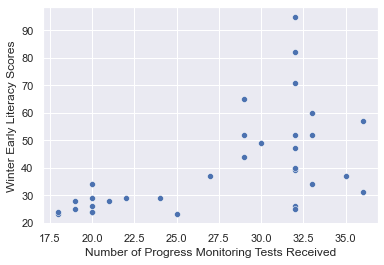

In [44]:
splot = sns.scatterplot(x='number_of_monitoring_tests', y = 'Score', data = df2)
plt.ylabel('Winter Early Literacy Scores')
plt.xlabel('Number of Progress Monitoring Tests Received')
# splot.set(yscale="log")
plt.show()

Among the students that grew out of the bottom quartile from Fall to Winter, there does seem to be a positive trend in that as the number of progress monitoring tests received increases, the Winter Early Literacy Scores tend to be higher.

What does this look like by teacher?

In [45]:
# get number of students for each teacher_id
df2.teacher_id.value_counts()

10    12
23     9
5      2
22     2
4      2
18     2
6      2
7      1
9      1
11     1
Name: teacher_id, dtype: int64

We'll focus on teacher_id 10 and 23, since the rest only have 2 students or less from this group (that is, group of students that grew out of bottom quartile).

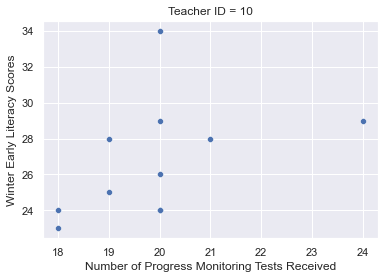

In [46]:
splot = sns.scatterplot(x='number_of_monitoring_tests', y = 'Score', data = df2[df2.teacher_id==10])
plt.ylabel('Winter Early Literacy Scores')
plt.xlabel('Number of Progress Monitoring Tests Received')
plt.title('Teacher ID = 10')
plt.show()

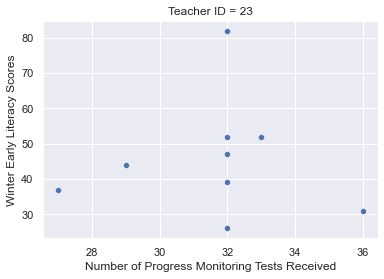

In [47]:
splot = sns.scatterplot(x='number_of_monitoring_tests', y = 'Score', data = df2[df2.teacher_id==23])
plt.ylabel('Winter Early Literacy Scores')
plt.xlabel('Number of Progress Monitoring Tests Received')
plt.title('Teacher ID = 23')
plt.show()